## Edge Detection using Sobel, Prewitt, Roberts

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_grid(images, titles, rows, cols, big_title):
    plt.figure(figsize=(5 * cols, 4 * rows))
    plt.suptitle(big_title, fontsize=22)

    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.show()


In [3]:
# Function to add Gaussian Noise (variance 0.1, 0.2, 0.5)
# ---------------------------------------------------------------
def add_gaussian_noise(img, variance):
    img_float = img.astype(np.float32) / 255.0
    noise = np.random.normal(0, np.sqrt(variance), img.shape)
    noisy = img_float + noise
    noisy = np.clip(noisy, 0, 1)
    noisy = (255 * noisy).astype(np.uint8)
    return noisy

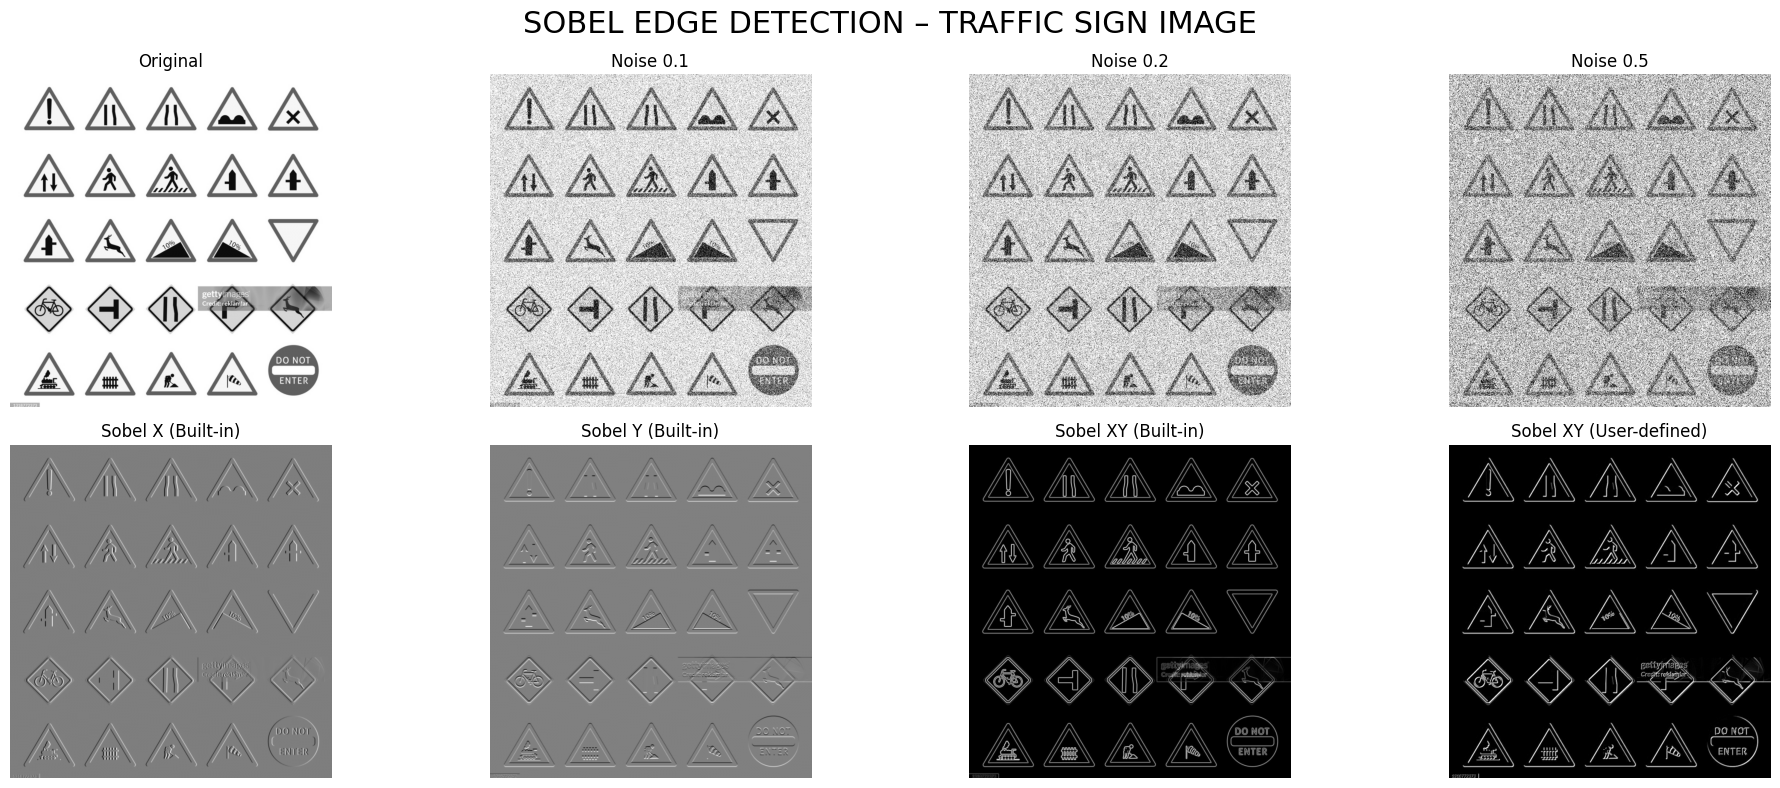

In [4]:
# 1. SOBEL EDGE DETECTION – TRAFFIC SIGN IMAGE

traffic = cv2.imread("sign.jpeg", 0)

# Add noise
t01 = add_gaussian_noise(traffic, 0.1)
t02 = add_gaussian_noise(traffic, 0.2)
t05 = add_gaussian_noise(traffic, 0.5)

# Built-in Sobel 
sobel_x = cv2.Sobel(traffic, cv2.CV_64F, 1, 0)
sobel_y = cv2.Sobel(traffic, cv2.CV_64F, 0, 1)
sobel_xy = cv2.magnitude(sobel_x, sobel_y)

# User-defined Sobel 
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

sobel_ud_x = cv2.filter2D(traffic, -1, sobel_kernel_x)
sobel_ud_y = cv2.filter2D(traffic, -1, sobel_kernel_y)
sobel_ud_xy = cv2.magnitude(sobel_ud_x.astype(float), sobel_ud_y.astype(float))

display_grid(
    [traffic, t01, t02, t05, sobel_x, sobel_y, sobel_xy, sobel_ud_xy],
    ["Original", "Noise 0.1", "Noise 0.2", "Noise 0.5",
     "Sobel X (Built-in)", "Sobel Y (Built-in)", "Sobel XY (Built-in)", 
     "Sobel XY (User-defined)"],
    rows=2, cols=4,
    big_title="SOBEL EDGE DETECTION – TRAFFIC SIGN IMAGE"
)


INTERPRETATION – SOBEL:
• Sobel X detects vertical edges clearly.
• Sobel Y detects horizontal edges.
• Combined Sobel shows strong boundaries of traffic signs.
• User-defined result is similar to built-in, confirming correctness.
• Sobel is stable even under medium noise (0.2) due to smoothing effect.

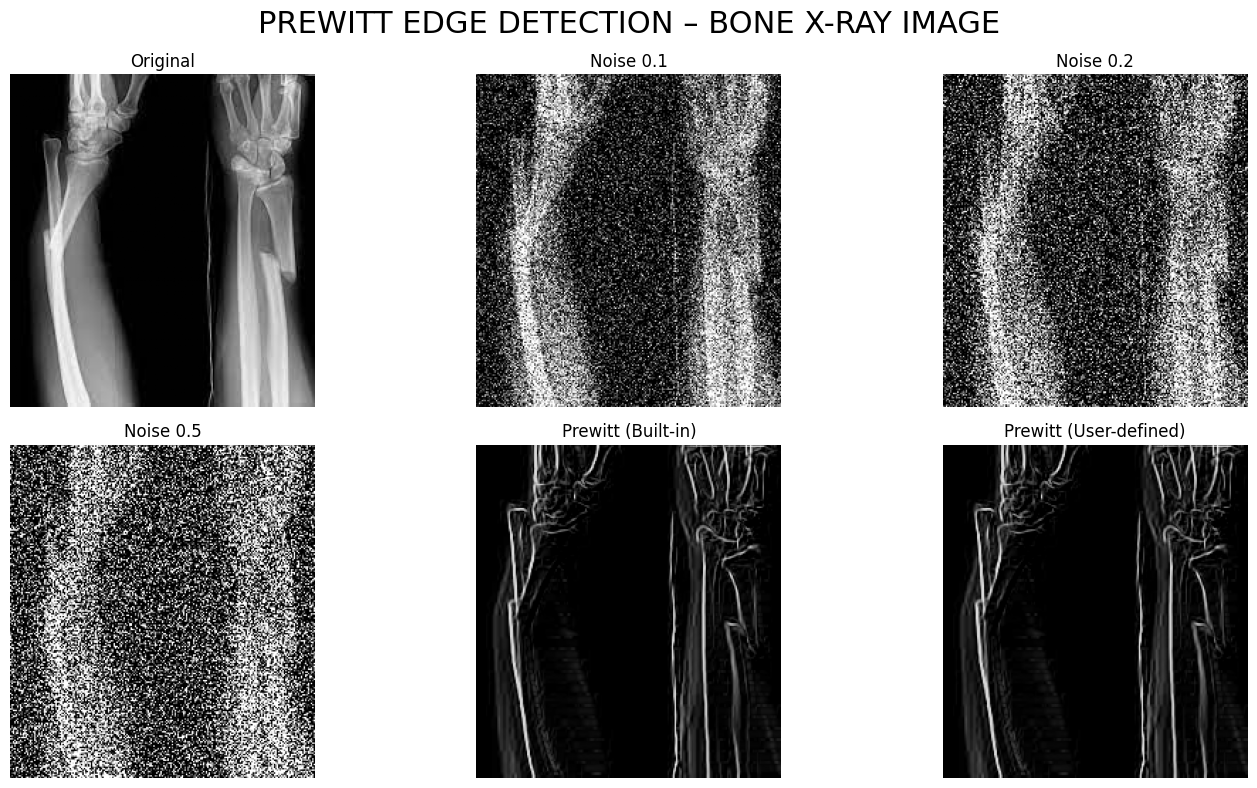

In [6]:
# 2. PREWITT EDGE DETECTION – BONE X-RAY IMAGE

bone = cv2.imread("bone.jpeg", 0)

b01 = add_gaussian_noise(bone, 0.1)
b02 = add_gaussian_noise(bone, 0.2)
b05 = add_gaussian_noise(bone, 0.5)

# Built-in Prewitt  
prew_x = cv2.filter2D(bone, -1, np.array([[-1,0,1],[-1,0,1],[-1,0,1]]))
prew_y = cv2.filter2D(bone, -1, np.array([[-1,-1,-1],[0,0,0],[1,1,1]]))
prew_xy = cv2.magnitude(prew_x.astype(float), prew_y.astype(float))

# User-defined Prewitt 
prewitt_kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_kernel_y = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

prew_ud_x = cv2.filter2D(bone, -1, prewitt_kernel_x)
prew_ud_y = cv2.filter2D(bone, -1, prewitt_kernel_y)
prew_ud_xy = cv2.magnitude(prew_ud_x.astype(float), prew_ud_y.astype(float))

display_grid(
    [bone, b01, b02, b05, prew_xy, prew_ud_xy],
    ["Original", "Noise 0.1", "Noise 0.2", "Noise 0.5", 
     "Prewitt (Built-in)", "Prewitt (User-defined)"],
    rows=2, cols=3,
    big_title="PREWITT EDGE DETECTION – BONE X-RAY IMAGE"
)

INTERPRETATION – PREWITT:
• Prewitt is less sensitive to noise than Sobel.
• Suitable for uniform-intensity bone X-ray images.
• Sobel performs better on edges with rapid intensity changes.
• Prewitt is simple and gives clean bone boundaries.

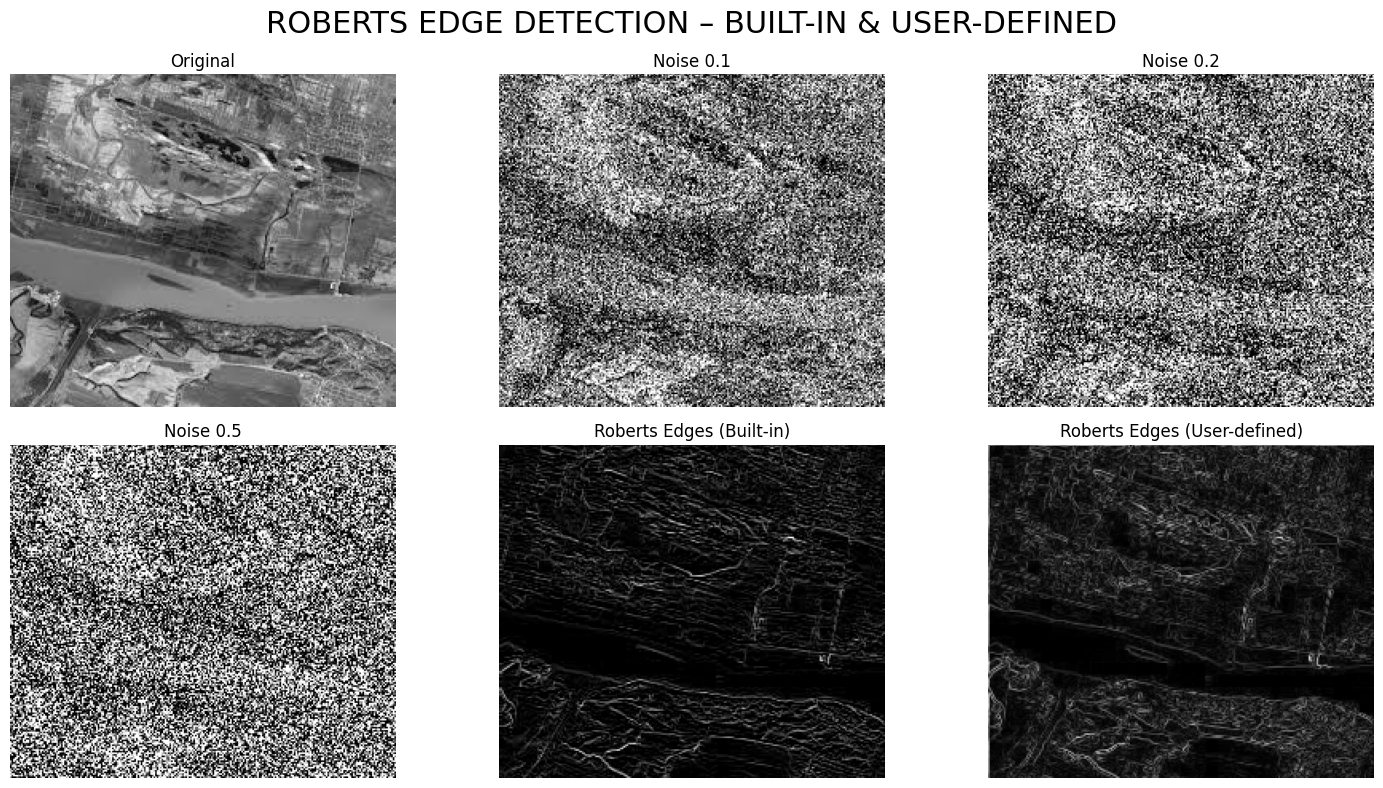

In [ ]:
# 3. ROBERTS EDGE DETECTION – SATELLITE IMAGE

sat = cv2.imread("satellite.jpeg", 0)

s01 = add_gaussian_noise(sat, 0.1)
s02 = add_gaussian_noise(sat, 0.2)
s05 = add_gaussian_noise(sat, 0.5)

# Roberts kernels
rob_x = np.array([[1, 0],
                  [0, -1]])

rob_y = np.array([[0, 1],
                  [-1, 0]])


# BUILT-IN LIKE IMPLEMENTATION (using cv2.filter2D)
built_r_x = cv2.filter2D(sat, -1, rob_x)
built_r_y = cv2.filter2D(sat, -1, rob_y)
built_r_xy = cv2.magnitude(built_r_x.astype(float), built_r_y.astype(float))


# USER-DEFINED IMPLEMENTATION — MANUAL CONVOLUTION
def manual_convolve(img, kernel):
    kH, kW = kernel.shape
    H, W = img.shape
    pad_h, pad_w = kH // 2, kW // 2

    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(img, dtype=float)

    for i in range(H):
        for j in range(W):
            region = padded[i:i+kH, j:j+kW]
            output[i, j] = np.sum(region * kernel)

    return output


user_r_x = manual_convolve(sat, rob_x)
user_r_y = manual_convolve(sat, rob_y)
user_r_xy = np.sqrt(user_r_x**2 + user_r_y**2)


display_grid(
    [
        sat, s01, s02, s05,
        built_r_xy,      
        user_r_xy       
    ],
    [
        "Original", "Noise 0.1", "Noise 0.2", "Noise 0.5",
        "Roberts Edges (Built-in)",
        "Roberts Edges (User-defined)"
    ],
    rows=2, cols=3,
    big_title="ROBERTS EDGE DETECTION - BUILT-IN & USER-DEFINED"
)


INTERPRETATION – ROBERTS:
• Captures fine details (2×2 small kernel).
• Good for detecting tiny structures (roads, rooftops).
• HIGHLY noise sensitive – noise dominates edges at variance 0.5.
• Not suitable for real-world satellite images with shadows + noise.

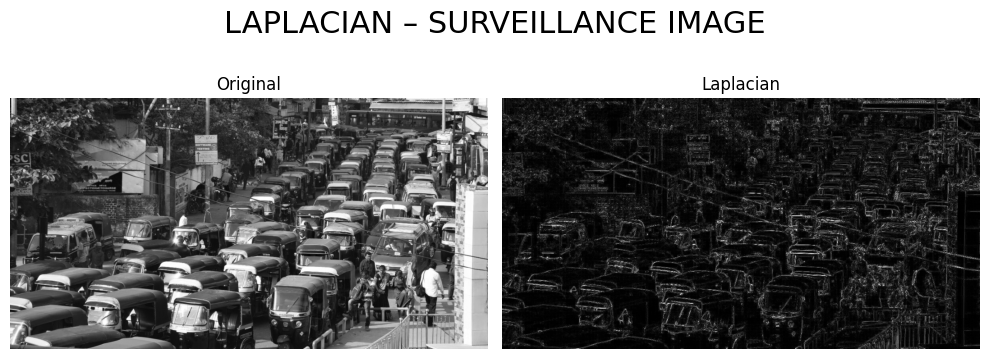

In [9]:
# 4. LAPLACIAN EDGE DETECTION – SURVEILLANCE IMAGE


sur = cv2.imread("road.jpeg", 0)

# Raw Laplacian (contains negative values)
lap = cv2.Laplacian(sur, cv2.CV_64F)

# Convert to visible form
lap_visible = cv2.convertScaleAbs(lap)

display_grid(
    [sur, lap_visible],
    ["Original", "Laplacian"],
    rows=1, cols=2,
    big_title="LAPLACIAN – SURVEILLANCE IMAGE"
)



INTERPRETATION – LAPLACIAN:
• Detects edges in all directions (no directional bias).
• Useful in surveillance where object angles vary.
• Very sensitive to noise because it uses second derivatives.

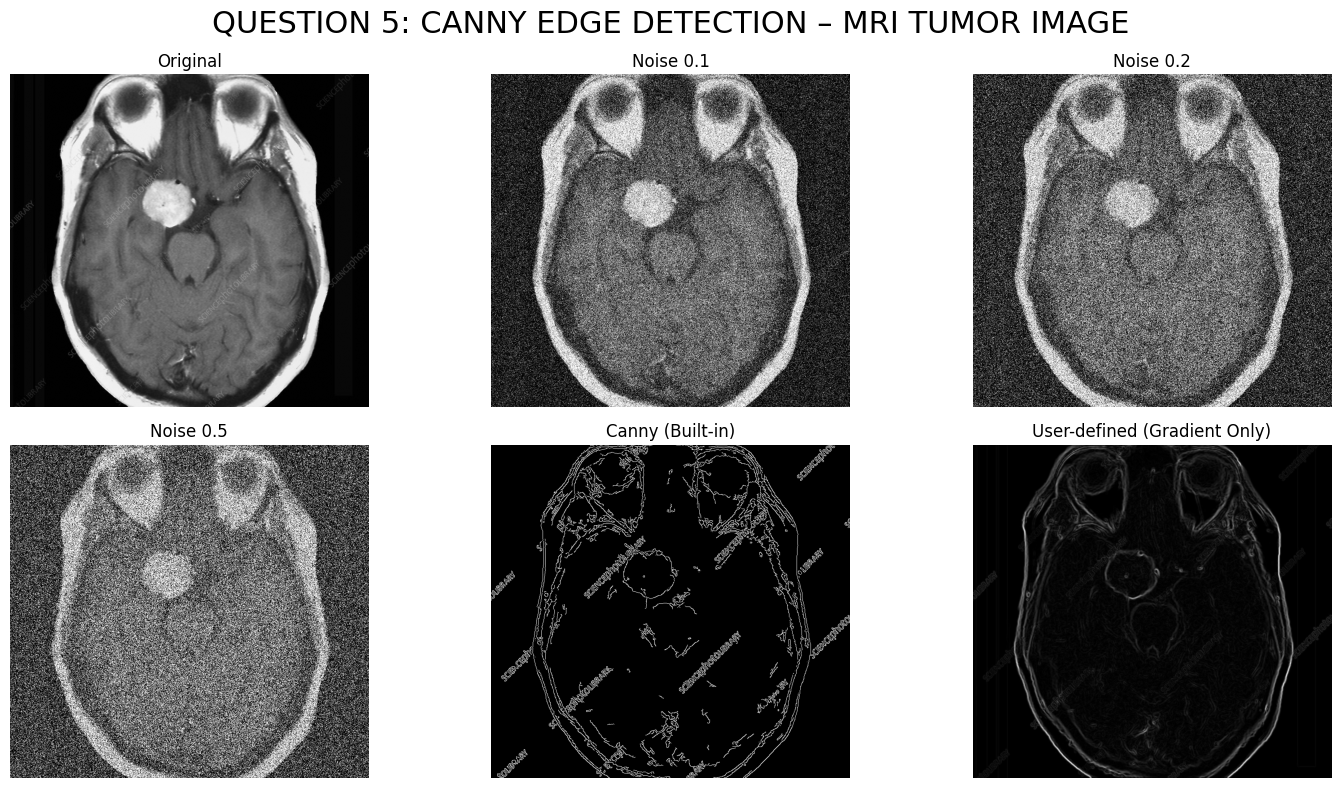

In [10]:
# 5. CANNY EDGE DETECTION – MRI BRAIN TUMOR


mri = cv2.imread("skull.jpeg", 0)

m01 = add_gaussian_noise(mri, 0.1)
m02 = add_gaussian_noise(mri, 0.2)
m05 = add_gaussian_noise(mri, 0.5)

# Built-in Canny
canny = cv2.Canny(mri, 50, 150)

# User-defined Canny (NOT full algorithm; gradient-only demonstration)
blur = cv2.GaussianBlur(mri, (5,5), 1)
gx = cv2.Sobel(blur, cv2.CV_64F, 1, 0)
gy = cv2.Sobel(blur, cv2.CV_64F, 0, 1)
user_gradient = cv2.magnitude(gx, gy)

display_grid(
    [mri, m01, m02, m05, canny, user_gradient],
    ["Original", "Noise 0.1", "Noise 0.2", "Noise 0.5",
     "Canny (Built-in)", "User-defined (Gradient Only)"],
    rows=2, cols=3,
    big_title="QUESTION 5: CANNY EDGE DETECTION – MRI TUMOR IMAGE"
)


INTERPRETATION – CANNY:
• Gaussian Smoothing → Removes noise.
• Gradient Computation → Calculates edge strength.
• Non-Maximum Suppression → Thins edges sharply.
• Double Thresholding → Removes weak false edges.
• Excellent for detecting brain tumor boundaries.